In [42]:
#IMPORT THE NECCESSARY LIBRARIES
#We are going to import the neccessary libraries for the dataset
#These include Pandas,numpy, seaborn,matplotlib,norm and stats

In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.impute import SimpleImputer


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier



In [444]:
#READ DATASET
#we are going to read the data into the Data Frame.

In [445]:
data_frame = pd.read_csv('C:/Users/HP/Desktop/AirBnBPricing/airbnb-price_predict-main/datasets/AB_NYC_2019.csv')

In [446]:
#1.DATA DISCOVERY
# This refers to familiarising yourself with data such that you can conceptualise it

In [447]:
#1.1 Data Preparation
#The data preparation phase rearranges the data so that the visualization and analysis portion of 
#data discovery can run more smoothly.


In [448]:
#Checking to see how the dataset looks like
#Display the first five rows of the dataset
#This confirms the type of data frame in use

In [449]:
data_frame.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [450]:
#Display twenty rows of the dataset randomly

In [451]:
data_frame.sample(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
27100,21437509,Peaceful Artist's Room in Williamsburg,13081524,Sarah,Brooklyn,Williamsburg,40.71226,-73.93949,Private room,60,2,48,2019-06-29,2.30,1,13
9993,7686940,The Wielingen,40371157,Jimmy,Bronx,Longwood,40.82417,-73.90156,Private room,95,1,182,2019-01-01,3.82,2,0
288,66741,Charming Garden Apt in Park Slope,327673,Stefano,Brooklyn,Park Slope,40.67732,-73.98225,Entire home/apt,150,2,214,2019-06-23,2.08,2,263
22033,17729060,Cute and Sunny Soho Room,4135793,Zoe,Manhattan,Nolita,40.72263,-73.99622,Private room,75,1,8,2017-04-30,0.28,1,0
7639,5756241,1 bedroom in a 2 bedroom apartment,11732381,Teri,Manhattan,Midtown,40.75858,-73.96342,Entire home/apt,200,2,0,NaN,NaN,1,0
24886,19951242,Luxury Williamsburg with Panoramic City Views,202362,Liad,Brooklyn,Williamsburg,40.71910,-73.96170,Entire home/apt,275,5,3,2017-12-05,0.15,1,0
24803,19909197,Private Room in Park Slope Loft/Townhouse,52583380,Sebastian,Brooklyn,Park Slope,40.67872,-73.97920,Private room,88,3,8,2017-12-08,0.33,1,0
108,25696,"1,800 sq foot in luxury building",107628,Dena,Manhattan,Harlem,40.80920,-73.94421,Private room,100,2,170,2019-06-23,1.61,1,346
43885,33930074,"Your Private Oasis In A Shared Apt, Near 3 Tra...",242962235,Yuval,Queens,Ridgewood,40.70893,-73.89636,Private room,34,30,0,NaN,NaN,23,243
34143,27064423,New York Loft,1330116,Robert,Manhattan,Greenwich Village,40.73237,-73.99344,Private room,200,30,1,2018-08-11,0.09,1,90


In [452]:
#Display the last five rows of the dataset

In [453]:
data_frame.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [454]:
#2. SANITY DATA CHECK

In [455]:
#Checking for number of missig or null values 

In [456]:
data_frame.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [457]:
data_frame.isnull().sum()/len(data_frame)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [458]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [459]:
# Dislpaying the columns in the dataframe

In [460]:
data_frame.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [461]:
# Describing the Dataframe

In [462]:
data_frame.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [463]:
data_frame[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [464]:
df1 = data_frame[['id',
    #'name', 
    'host_id', 
    #'host_name', 'neighbourhood_group',
       'neighbourhood', #'latitude', 'longitude', 
    'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].copy()

In [465]:
df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [466]:
# Determining the shape of the dataset

In [467]:
df1.shape

(48895, 11)

In [468]:
df1.dtypes

id                                  int64
host_id                             int64
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [469]:
df1.columns

Index(['id', 'host_id', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [470]:
# Renaming the columns

In [471]:
df1 = df1.rename(columns = {'id':'List_Id', 'host_id':'Host_Id', 'neighbourhood':'Neighbourhood', 'room_type':'Room_Type', 'price':'Price_Dollars',
       'minimum_nights':'Minimum_Nights', 'number_of_reviews':'Number_Of_Reviews', 'last_review':'Last_Reviews',
       'reviews_per_month':'Reviews_Per_Month', 'calculated_host_listings_count':'Number_Of_Host_Listings',
       'availability_365':'Availability'})

In [472]:
df1.head()

,List_Id,Host_Id,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,2539,2787,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [473]:
df1.sample(20)

,List_Id,Host_Id,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
3369,2020881,10387304,East Village,Entire home/apt,300,2,17,2019-01-02,0.55,2,169
31932,24919299,128258877,Upper West Side,Entire home/apt,100,1,4,2018-10-16,0.29,1,0
27077,21423426,10391716,East Village,Entire home/apt,190,4,68,2019-06-24,3.34,1,41
37738,29903897,222581357,Bushwick,Private room,50,30,51,2019-06-10,6.32,3,227
21990,17686461,79105834,Long Island City,Private room,58,1,104,2019-06-11,3.74,9,300
44349,34184826,45317760,Upper East Side,Private room,60,14,3,2019-06-02,2.25,3,29
32892,25925504,192951036,SoHo,Private room,129,1,38,2019-07-06,2.98,10,151
13633,10207847,16098958,Financial District,Entire home/apt,165,30,0,NaN,NaN,96,329
43589,33742429,1648806,Williamsburg,Private room,90,2,2,2019-06-10,1.18,2,174
20150,16143844,35281088,Harlem,Private room,44,2,45,2019-06-29,1.43,1,18


In [474]:
df1.tail()

,List_Id,Host_Id,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
48890,36484665,8232441,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,68119814,Hell's Kitchen,Private room,90,7,0,NaN,NaN,1,23


In [475]:
#2. SANITY DATA CHECK

##Filling the Null value

In [476]:
#Checking for number of missig or null values 

In [477]:
df1.isnull()

,List_Id,Host_Id,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,True,True,False,False


In [478]:
df1.loc[df1.duplicated(subset = ['Neighbourhood'])]

,List_Id,Host_Id,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Last_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
10,5295,7702,Upper West Side,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,7989,Hell's Kitchen,Private room,85,2,188,2019-06-23,1.50,1,39
13,6021,11528,Upper West Side,Private room,85,2,113,2019-07-05,0.91,1,333
19,7750,17985,East Harlem,Entire home/apt,190,7,0,NaN,NaN,2,249
20,7801,21207,Williamsburg,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


In [479]:
df1.isnull().sum()/len(df1)*100

List_Id                     0.000000
Host_Id                     0.000000
Neighbourhood               0.000000
Room_Type                   0.000000
Price_Dollars               0.000000
Minimum_Nights              0.000000
Number_Of_Reviews           0.000000
Last_Reviews               20.558339
Reviews_Per_Month          20.558339
Number_Of_Host_Listings     0.000000
Availability                0.000000
dtype: float64

In [480]:
print("There are {} missing Values in the Data".format(data_frame.isnull().sum().sum()))

There are 20141 missing Values in the Data


In [481]:

# Fill missing values or drop columns with too many missing values



In [482]:
df1['Reviews_Per_Month'].fillna(0, inplace=True)
df1.drop(['Last_Reviews'], axis=1, inplace=True)



In [483]:
# Check for missing values

In [484]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [485]:
df1.isnull().sum()

List_Id                    0
Host_Id                    0
Neighbourhood              0
Room_Type                  0
Price_Dollars              0
Minimum_Nights             0
Number_Of_Reviews          0
Reviews_Per_Month          0
Number_Of_Host_Listings    0
Availability               0
dtype: int64

In [486]:
print("There are {} missing Values in the Data".format(df1.isnull().sum().sum()))

There are 0 missing Values in the Data


In [487]:
df1.loc[df1.duplicated()]

,List_Id,Host_Id,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability


In [488]:
df1.duplicated(subset = ['Neighbourhood'])

0        False
1        False
2        False
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Length: 48895, dtype: bool

In [489]:
df1.query('Neighbourhood =="East Harlem"')

,List_Id,Host_Id,Neighbourhood,Room_Type,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
4,5022,7192,East Harlem,Entire home/apt,80,10,9,0.10,1,0
19,7750,17985,East Harlem,Entire home/apt,190,7,0,0.00,2,249
70,16974,65837,East Harlem,Entire home/apt,225,4,190,1.64,1,215
154,36647,157798,East Harlem,Private room,69,2,34,0.32,1,10
208,54860,258164,East Harlem,Private room,100,5,204,1.92,1,192
...,...,...,...,...,...,...,...,...,...,...
48818,36447795,274035866,East Harlem,Entire home/apt,110,2,0,0.00,1,25
48874,36477588,214535893,East Harlem,Private room,50,7,0,0.00,1,22
48875,36478343,274273284,East Harlem,Private room,140,1,0,0.00,1,180
48883,36482416,131529729,East Harlem,Private room,75,2,0,0.00,2,364


In [490]:
df1.dtypes

List_Id                      int64
Host_Id                      int64
Neighbourhood               object
Room_Type                   object
Price_Dollars                int64
Minimum_Nights               int64
Number_Of_Reviews            int64
Reviews_Per_Month          float64
Number_Of_Host_Listings      int64
Availability                 int64
dtype: object

In [491]:
df1 = df1.loc[~df1.duplicated(subset = ['Neighbourhood','Room_Type','Minimum_Nights','Number_Of_Reviews'])]\
.reset_index(drop=True).copy()


In [492]:
#Checking for unique values

In [493]:
df1.nunique()

List_Id                    23877
Host_Id                    19525
Neighbourhood                221
Room_Type                      3
Price_Dollars                515
Minimum_Nights               109
Number_Of_Reviews            394
Reviews_Per_Month            899
Number_Of_Host_Listings       43
Availability                 366
dtype: int64

In [494]:
df1.shape

(23877, 10)

In [495]:
# Describing the df1 DataFrame

In [496]:
df1.describe()

,List_Id,Host_Id,Price_Dollars,Minimum_Nights,Number_Of_Reviews,Reviews_Per_Month,Number_Of_Host_Listings,Availability
count,2.387700e+04,2.387700e+04,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000,23877.000000
mean,1.476919e+07,5.385410e+07,142.285756,7.950706,40.057419,1.440328,2.816099,125.751979
std,1.048182e+07,6.805600e+07,232.306408,27.374581,56.620952,1.775315,12.395368,130.967852
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4.951402e+06,5.202854e+06,67.000000,2.000000,4.000000,0.170000,1.000000,0.000000
50%,1.400781e+07,2.246338e+07,100.000000,3.000000,17.000000,0.760000,1.000000,77.000000
75%,2.275209e+07,7.653684e+07,160.000000,5.000000,53.000000,2.210000,2.000000,249.000000
max,3.647575e+07,2.742256e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [497]:
#UNIVARIATE ANALYSIS

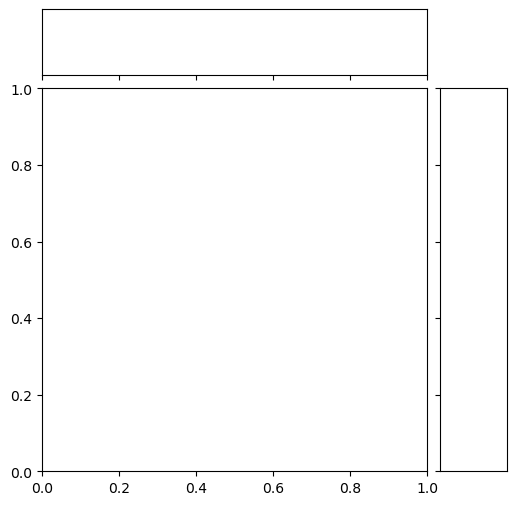

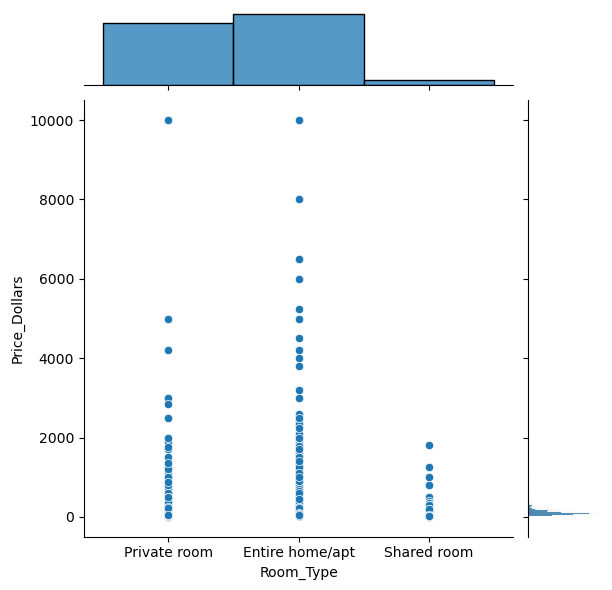

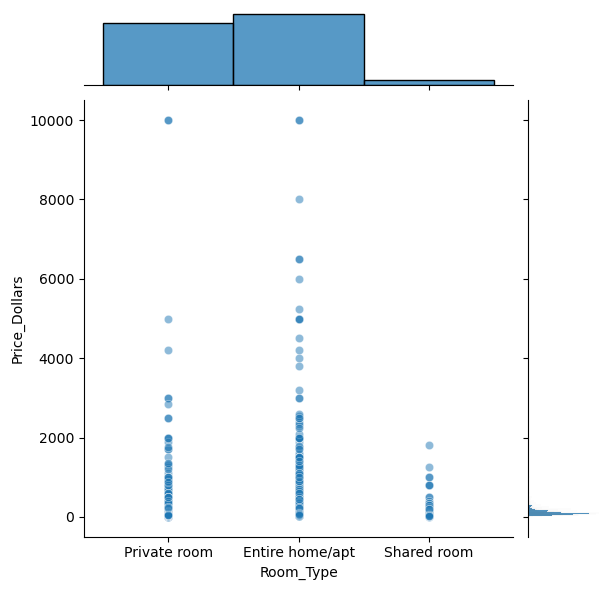

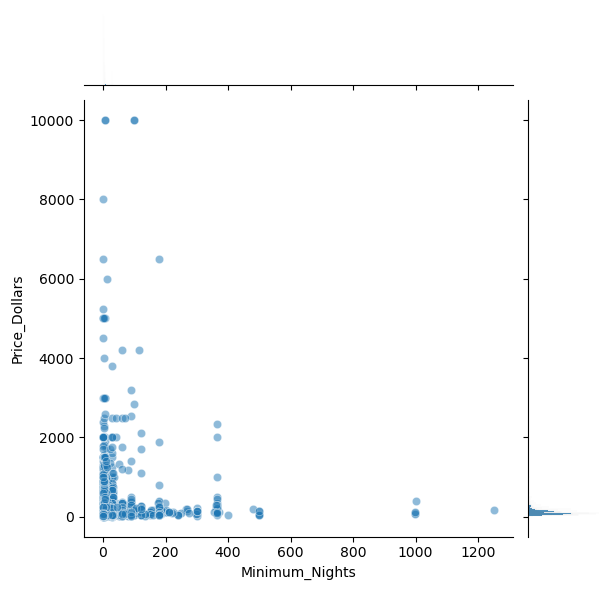

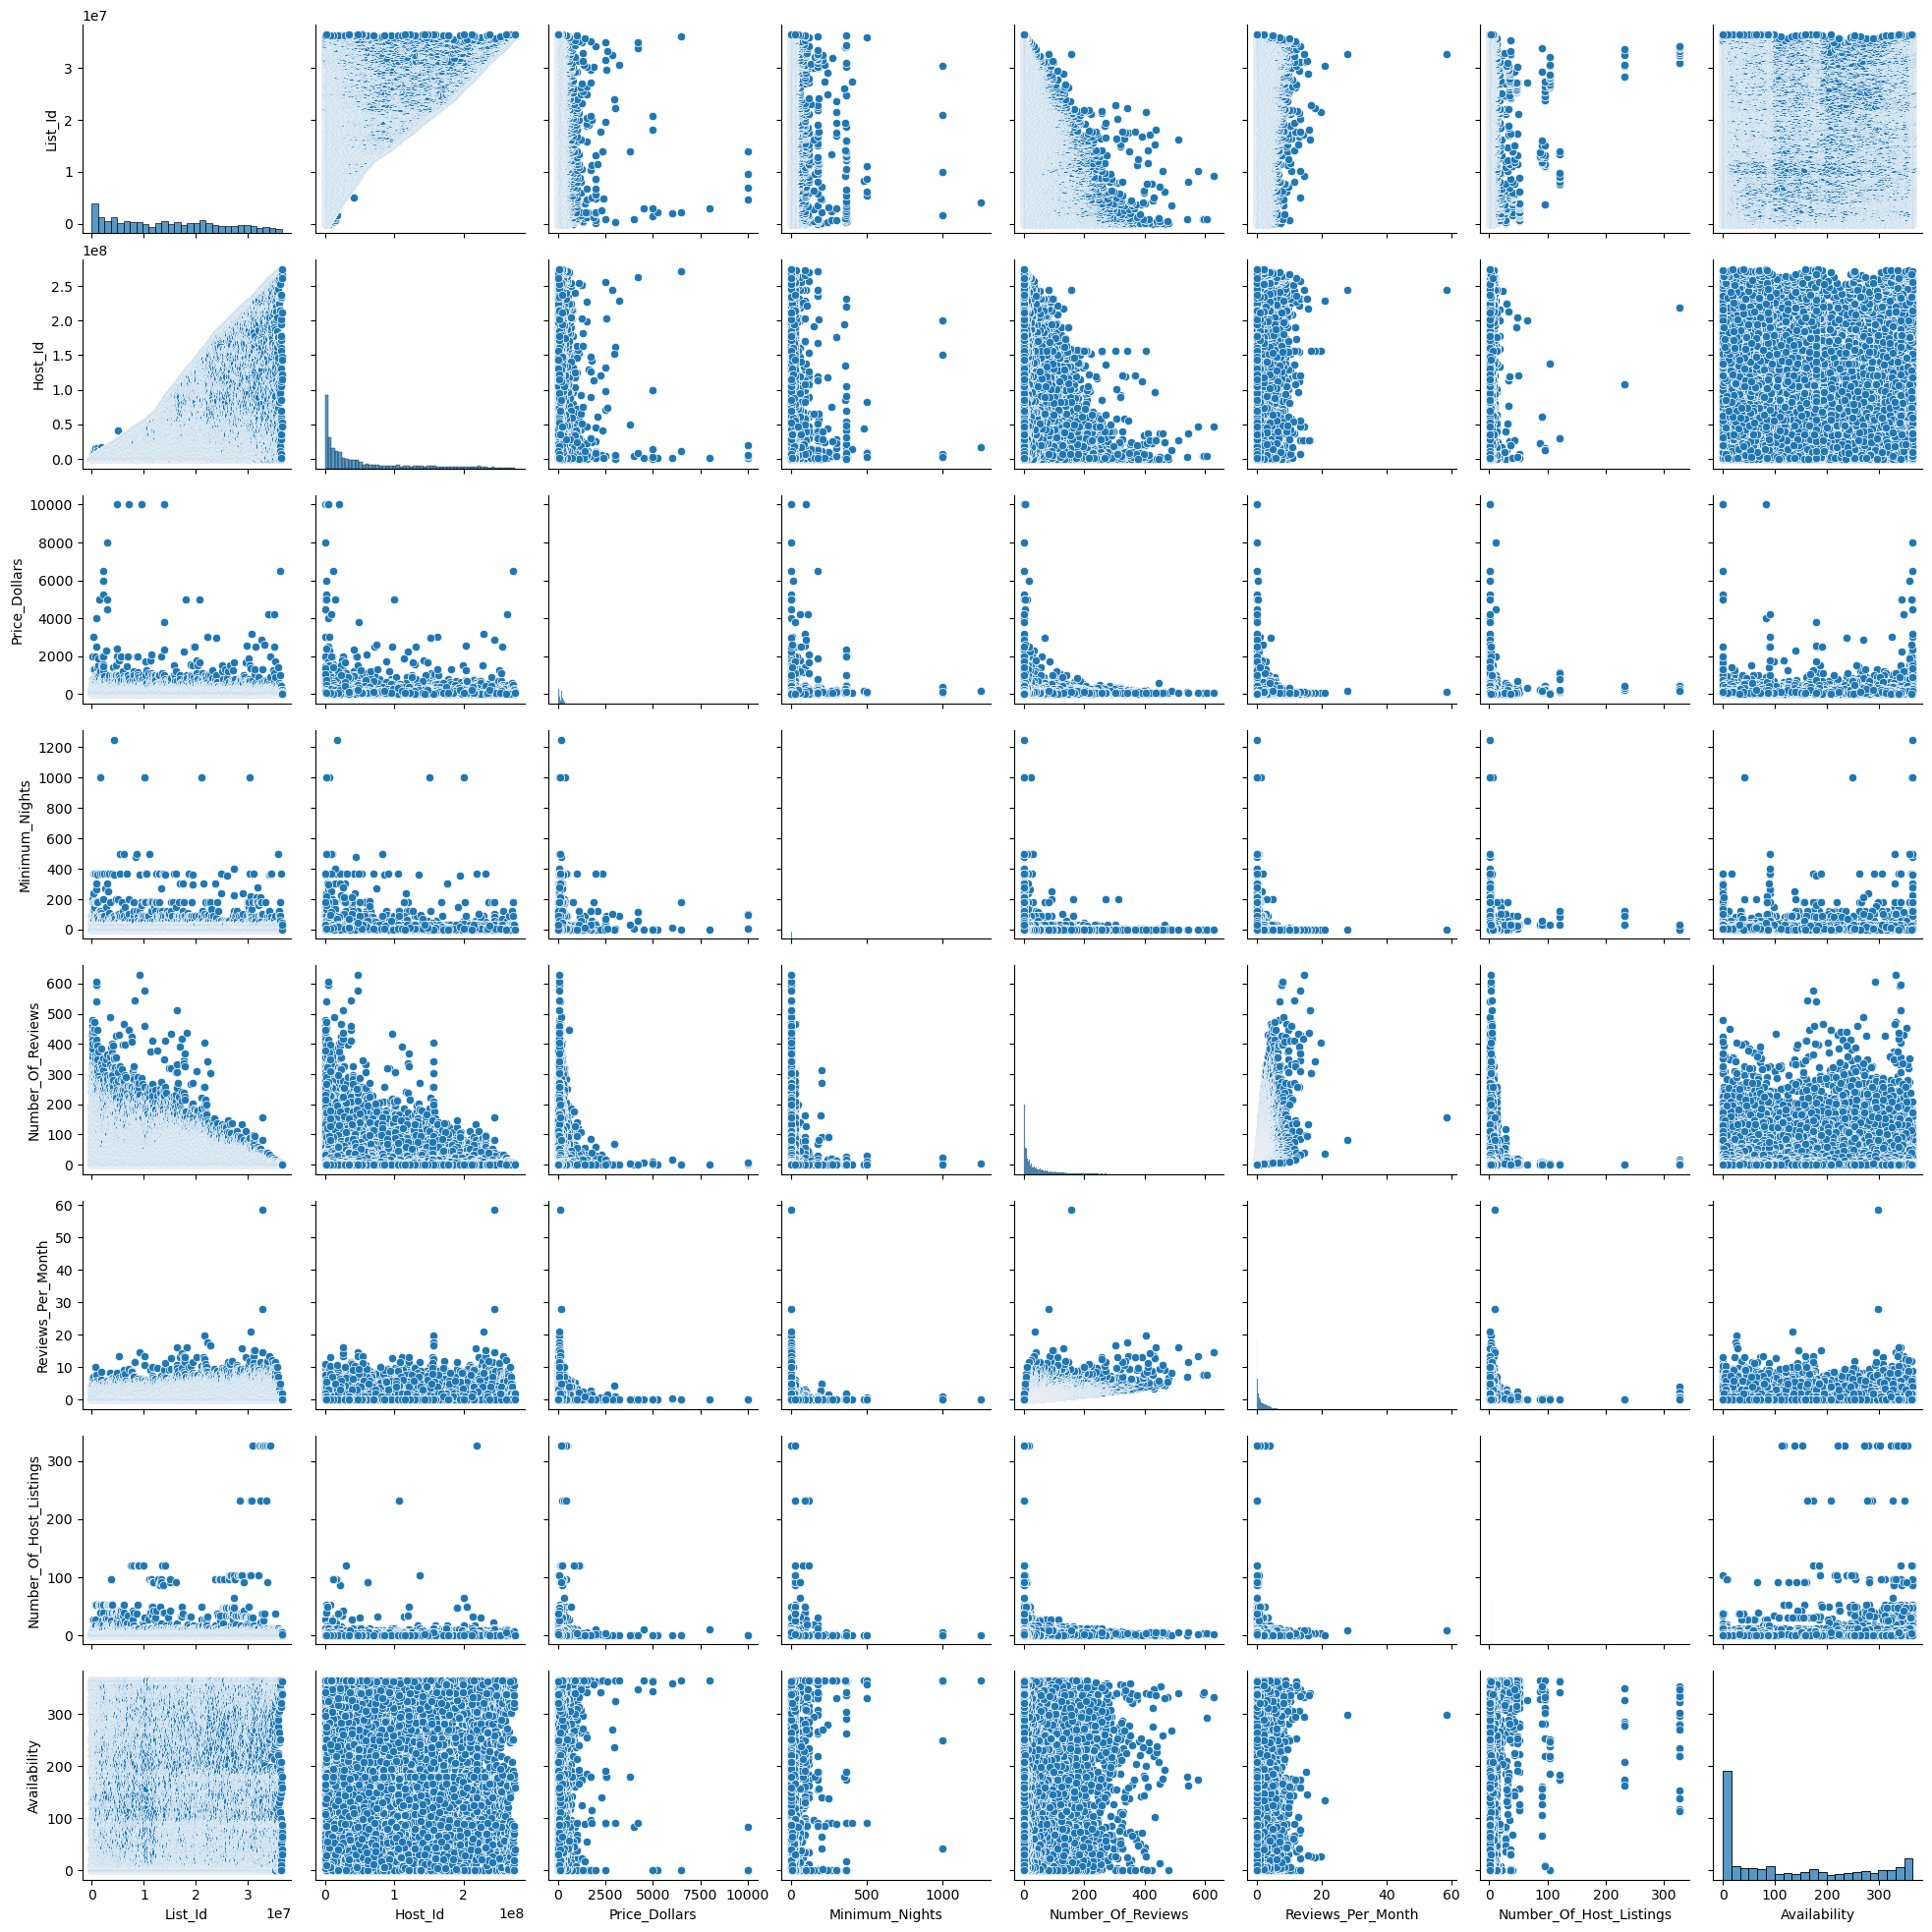

In [498]:
sns.pairplot(df1)
plt.show()

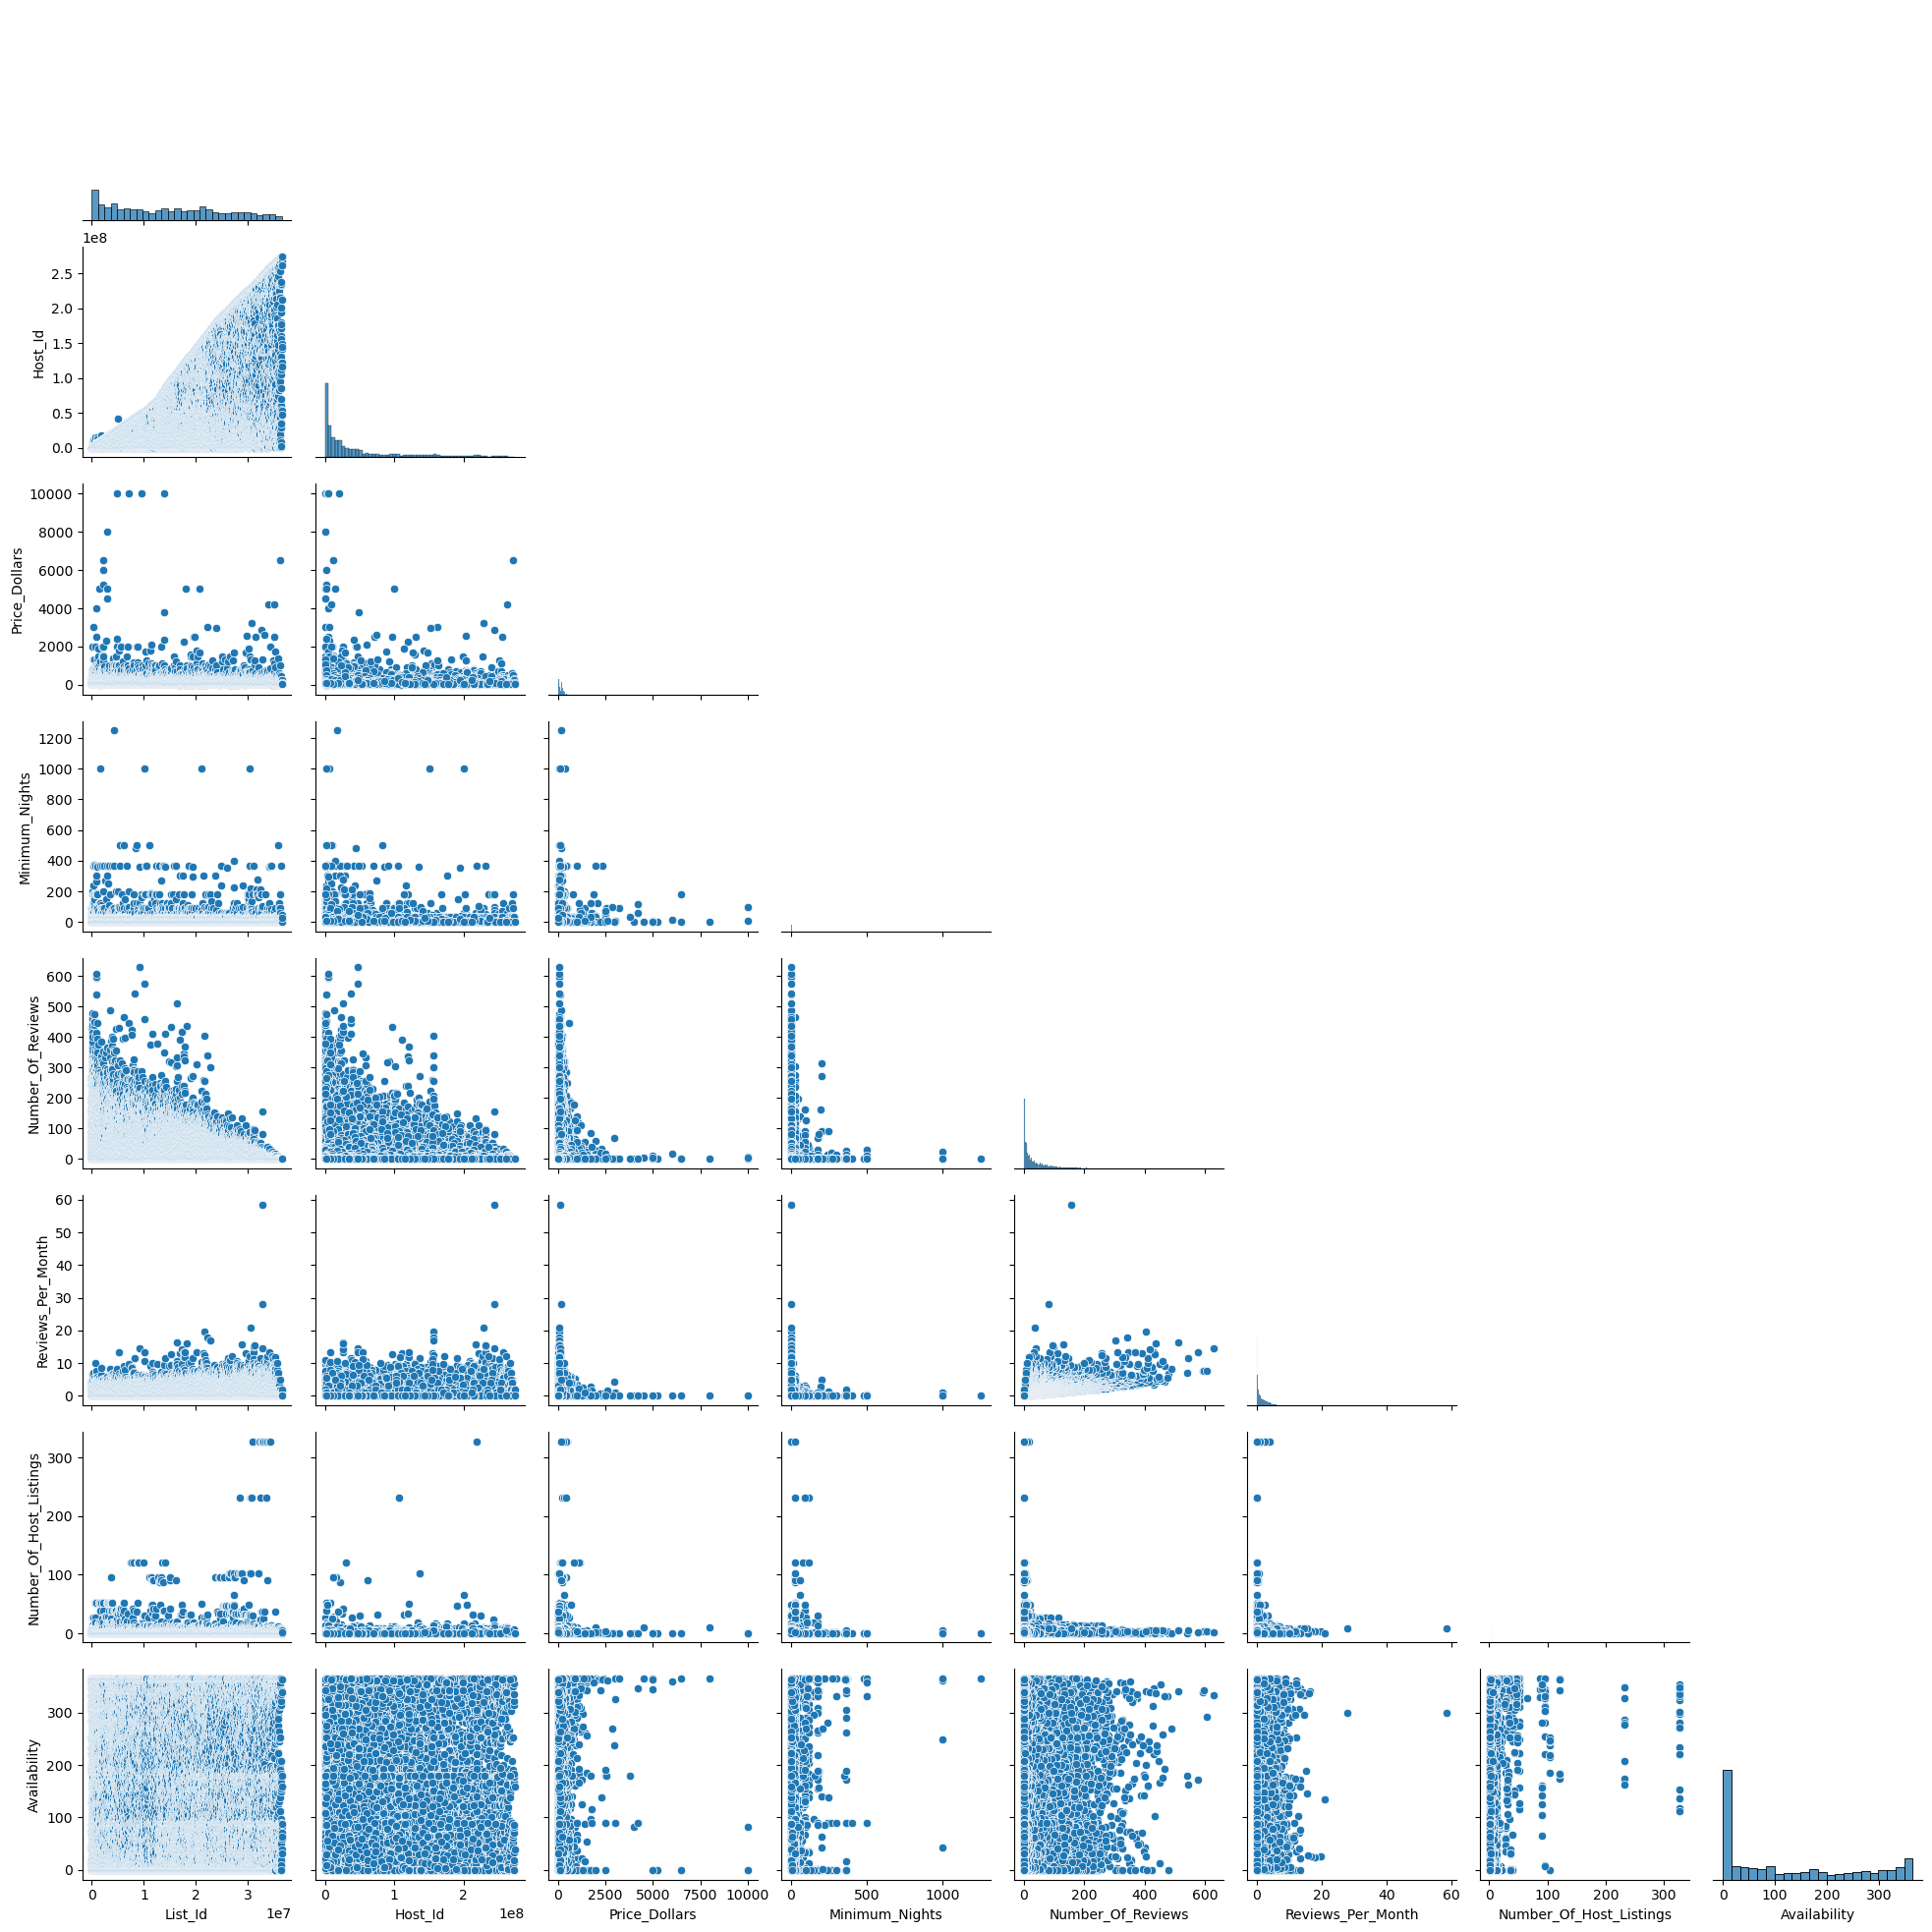

In [499]:
sns.pairplot(df1.iloc[:,0:10],corner=True)
plt.show()

In [ ]:
# Pie Chart showing room type distribution percentage

In [530]:
fig = plt.figure(figsize=(5,5), dpi=80)
df1['Room_Type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.title('Percentage Distribution of Room Type')

Text(0.5, 1.0, 'Percentage Distribution of Room Type')

In [500]:
# Histogram plots showing the Frequency distribution of Airbnb prices

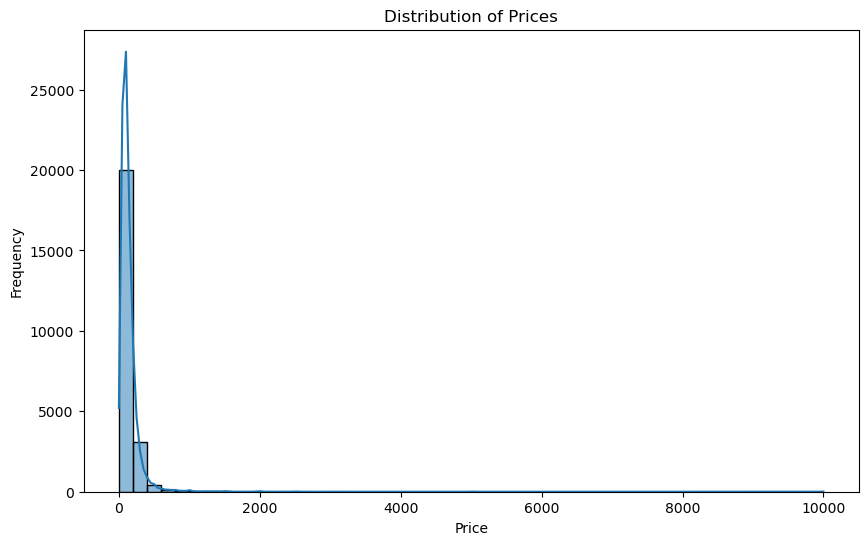

In [501]:

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df1['Price_Dollars'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [502]:
print(f"Average of price per night : ${df1.Price_Dollars.mean():.2f}")
print(f"Maximum price per night : ${df1.Price_Dollars.max()}")
print(f"Minimum price per night : ${df1.Price_Dollars.min()}")

Average of price per night : $142.29
Maximum price per night : $10000
Minimum price per night : $0


In [503]:
sns.jointplot(x ='Room_Type', y = 'Price_Dollars',data=df1,alpha=0.5)

In [504]:
sns.jointplot(x ='Minimum_Nights', y = 'Price_Dollars',data=df1,alpha=0.5)

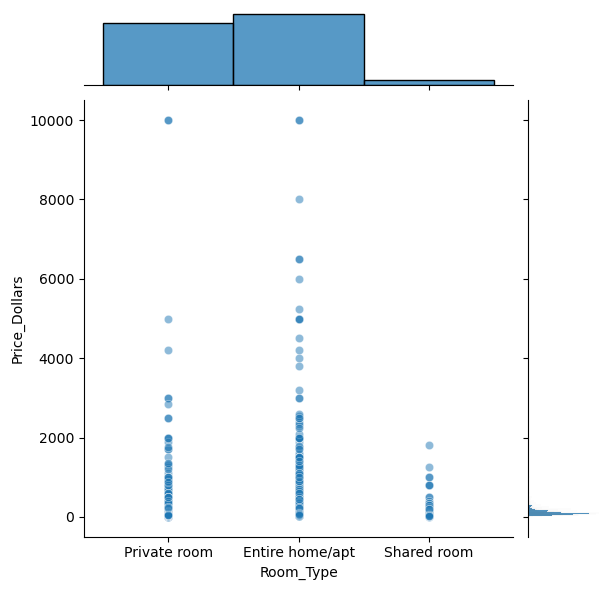

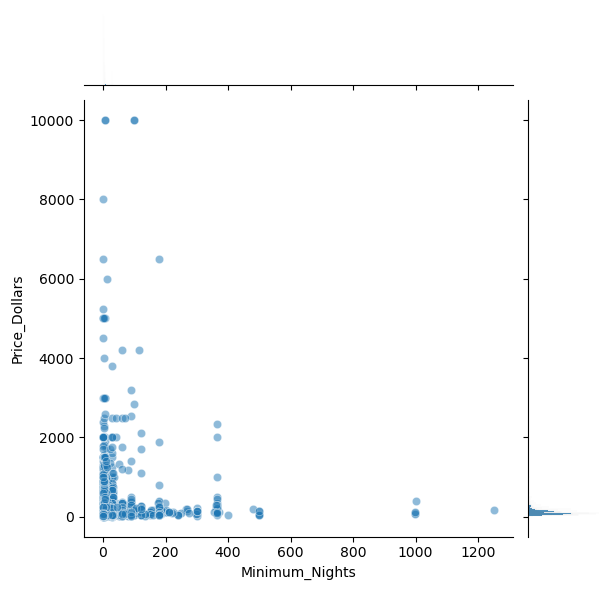

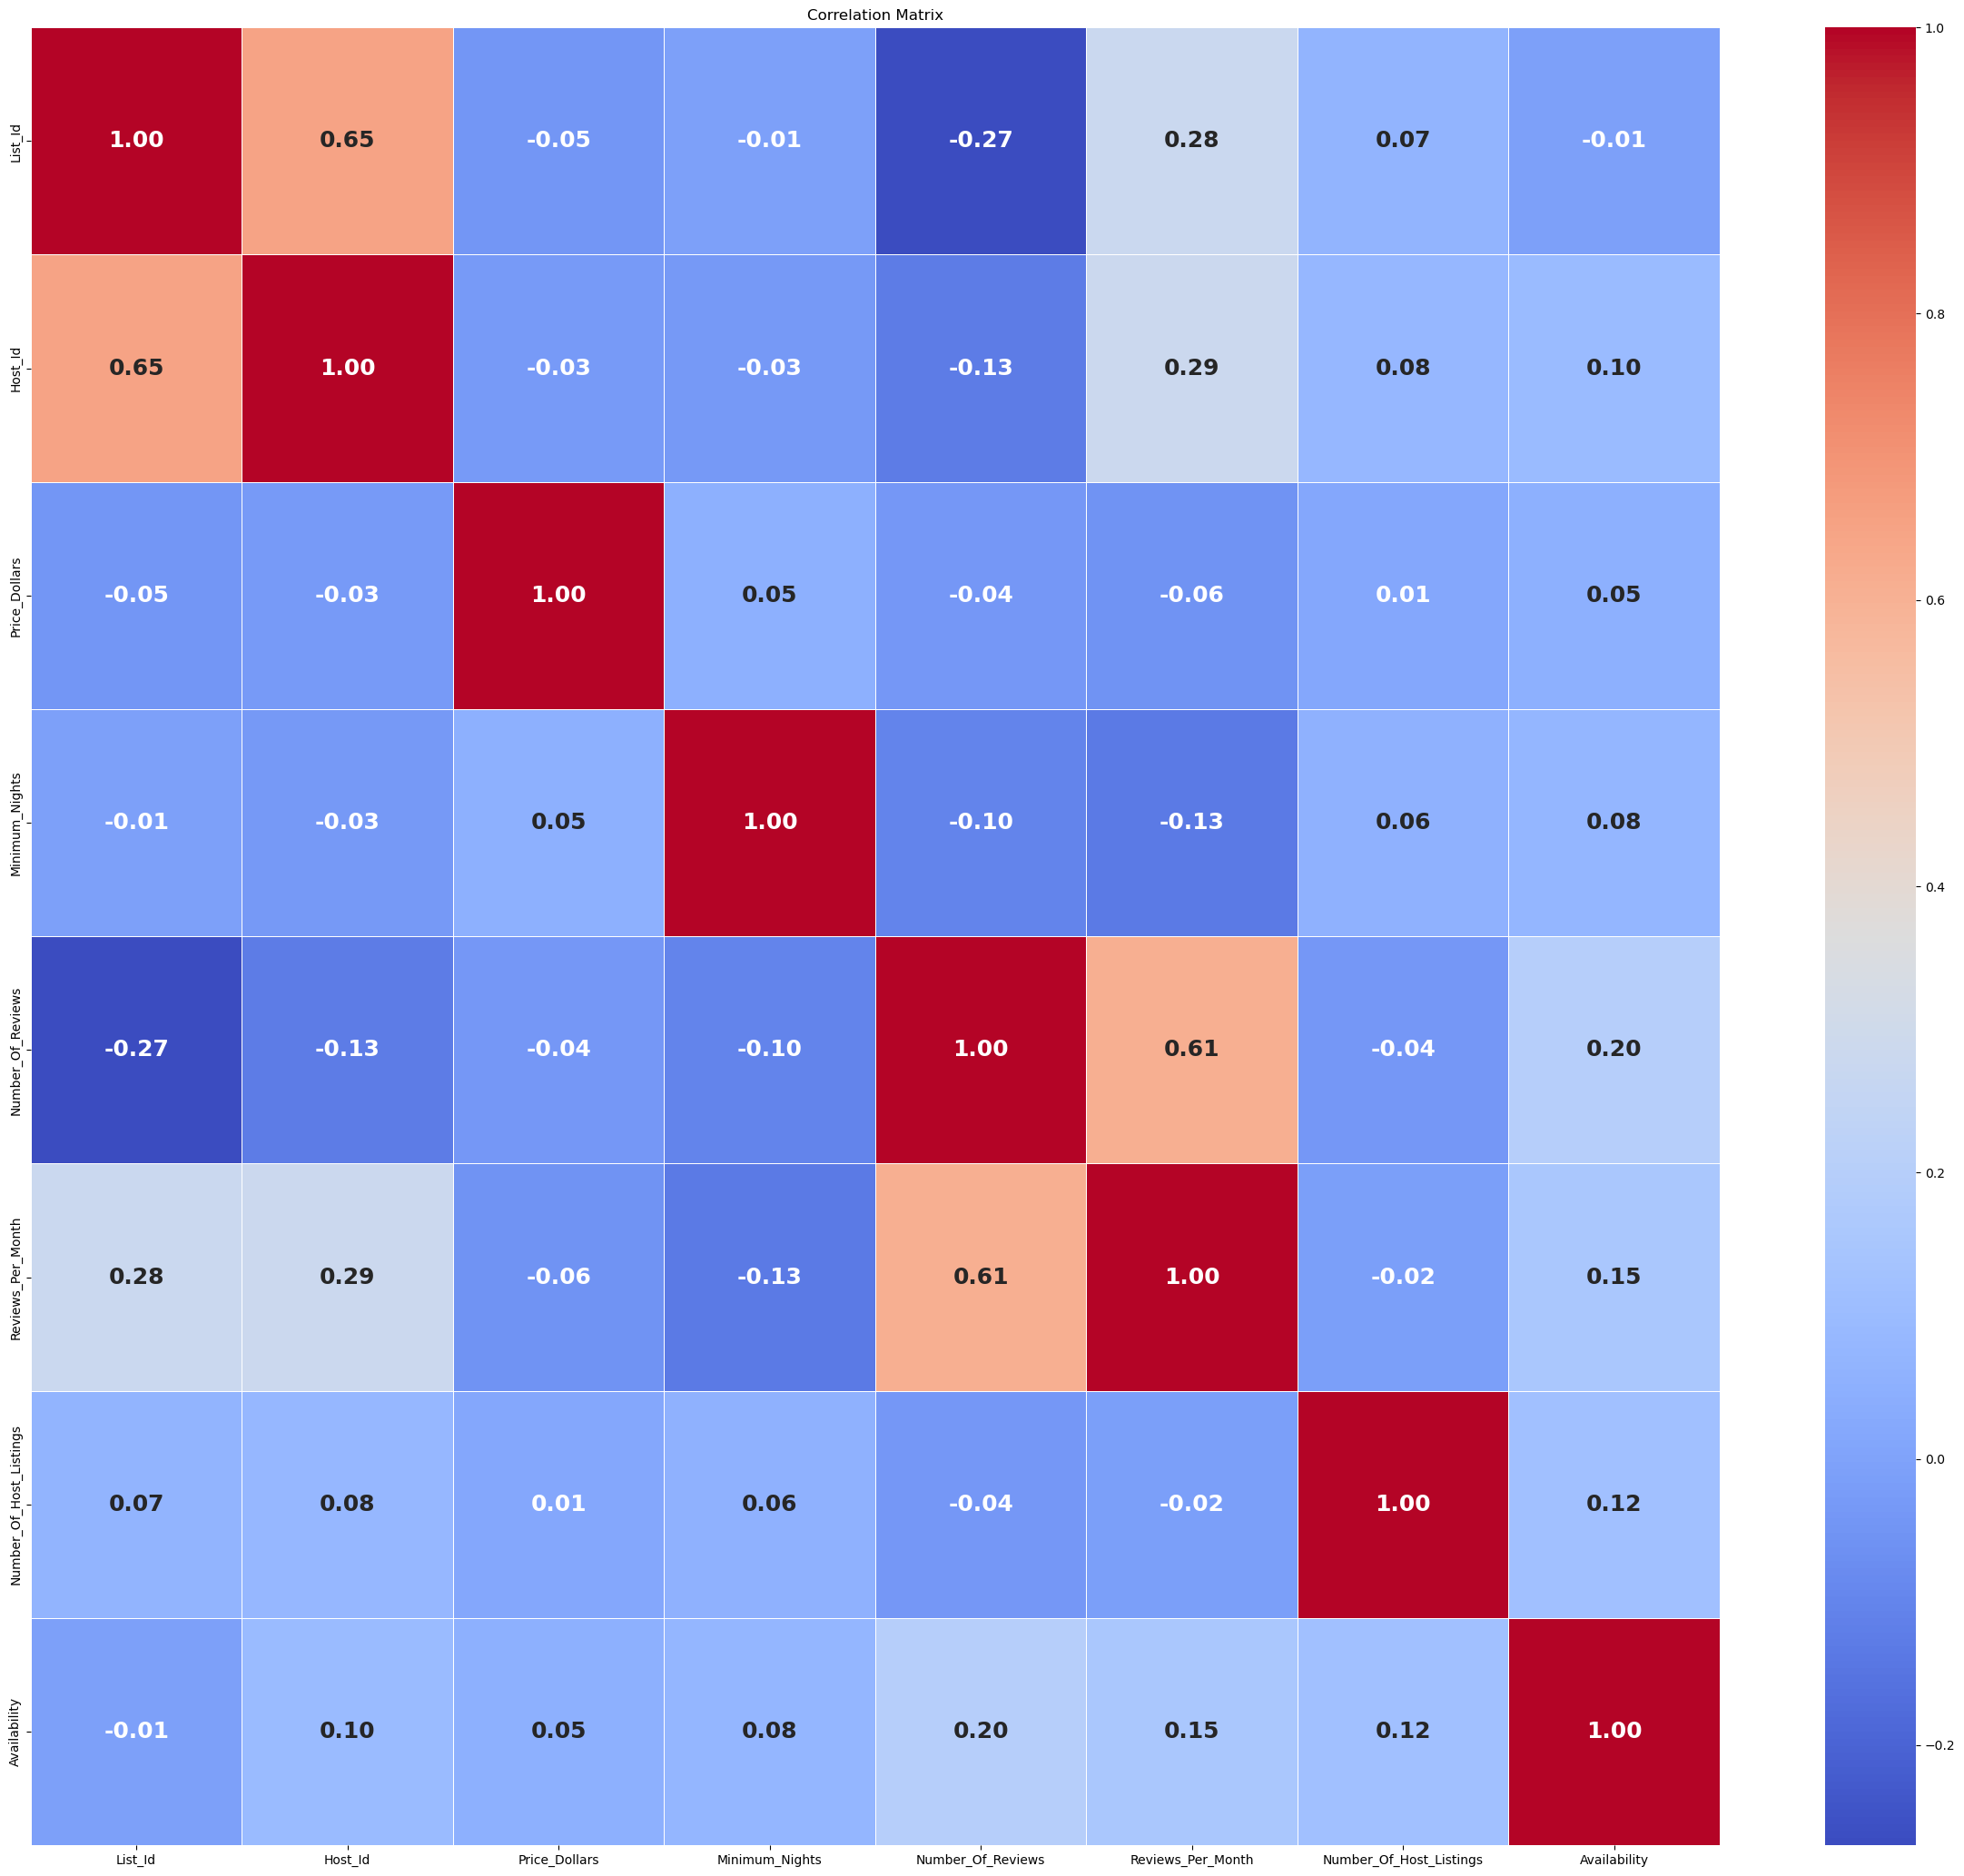

In [505]:
correlation_matrix = df1.corr()

plt.figure(figsize=(30, 26))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm',annot_kws={'fontsize':18, 'fontweight':'bold'})
plt.title('Correlation Matrix')
plt.show()


# LINEAR REGRESSION MODEL

In [506]:
# FEATURE SELECTION

In [507]:
# Select Relevant features for the model

In [508]:
features = ['Neighbourhood', 'Room_Type', 'Minimum_Nights', 'Number_Of_Reviews', 'Reviews_Per_Month', 'Availability']
X = pd.get_dummies(df1[features], drop_first=True)
y = df1['Price_Dollars']


In [509]:
# SPLITTING INTO TRAIN AND TEST

In [510]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [511]:
# MODEL TRAINING

In [512]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [513]:
# MODEL EVALUATION

In [514]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 63567.05070862657
Root Mean Squared Error: 252.12506957584876
Mean absolute Error: 70.04129670109366
R-squared: 0.07239053515393623


In [515]:
##  Mean Squared Error indicates the average of the squared differences between predicted and actual values.
# The MSE is 63567.05 which is high indicating a poor model performance.

## Root Mean Squared Error is the is the square root of the MSE
# It provides a measure of the average error in the same units as the target variable.
#The RMSE is 252.13, this indicates a poor model performance. 

## Mean Absolute Error (MAE): The MAE is 70.04, representing the average absolute differences between predicted and actual values. It's more interpretable than MSE/RMSE as it indicates the average error magnitude in a straightforward way.

## R-squared (R²): The R² value of 0.072 indicates that only about 7.2% of the variability in the dependent variable is explained by the independent variables in the model. This suggests that the model has a poor fit and might not be capturing the underlying patterns well.

## Summary
## The model has a high MSE and RMSE, indicating substantial prediction errors.
## The low R² value suggests that the model may not be effective in explaining the variance in the target variable, possibly indicating the need for more relevant features, a different modeling approach, or further data preprocessing.

##  LOGISTIC REGRESSION

In [516]:
# Convert the problem into a classification Problem.

In [517]:
# Data preparation

In [527]:
# Create a binary target variable
median_price = df1['Price_Dollars'].median()
df1['Price_category'] = (df1['Price_Dollars'] > median_price).astype(int)

# Update features and target
y = df1['rice_category']


In [519]:
# MODEL TRAINING

In [520]:

log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)


LogisticRegression()

In [521]:
# MODEL EVALUATION

In [522]:

y_pred_log = log_mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.04752931323283082
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00        13
          26       0.00      0.00      0.00         5
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         

In [523]:
## LASSO REGRESSION MODEL

In [524]:
# Model Training

In [525]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [526]:
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Root Means Squred Error (Lasso): {rmse_lasso}')
print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')


Mean Squared Error (Lasso): 63530.16605914847
Root Means Squred Error (Lasso): 252.05191143720467
Mean Absolute Error (Lasso): 69.45399313655469
R-squared (Lasso): 0.07292877862413027
